# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.2 Introduction<a id='2.2_Introduction'></a>

Focuses on collecting the data, organizing it, and making sure it's well defined.  
Some data cleaning can be done at this stage, but it's important not to be overzealous in my cleaning before I've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a pricing model for ski resort tickets in the market segment. Big Mountain suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for ticket price based on a number of facilities, or properties, boasted by resorts (*at the resorts).* 
This model will be Big Mountain's pricing and future facility investment plans.

## 2.3 Imports<a id='2.3_Imports'></a>

In [73]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file


## 2.4 Load The Ski Resort Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [74]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')

In [75]:
#Call the info on ski_data to see a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

`AdultWeekday` is the price of an adult weekday ticket. `AdultWeekend` is the price of an adult weekend ticket. The other columns are potential features.

In [76]:
#Call the head on ski_data to print the first several rows of the data
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Find Resort Of Interest<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [77]:
#Filter the ski_data dataframe to display just the row for the resort with the name 'Big Mountain Resort'
#find that the transpose 
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


### 2.6.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [78]:
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) 
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= 'count', ascending = False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
AdultWeekend,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


`fastEight` has the most missing values, at just over 50%. Unfortunately, I also find that quite a few entries are missing in my target variable, ticket price, with around 15–16% of values missing. `AdultWeekday` is missing in slightly more records than `AdultWeekend`.

I plan to explore the overlap between these missing values—do they occur together, or independently? This could reveal underlying patterns in the data.

Additionally, I note that `isnull()` is not the only way to detect missing data. Sometimes, missing values are encoded as placeholders like `-1`, `0`, or `999`, which are clearly not valid entries. These values won't be flagged by `isnull()`. For example, if `0` is used as a stand-in for missing height data, it's problematic since no person can have a height of 0 in any real unit.

To handle this, I will refer to the data dictionary, and also use outlier detection to help flag any obviously invalid values. Someone with a height of 0, for instance, should clearly show up as an outlier.

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

After analyzing the numeric features, I now turn my attention to the categorical features, such as `resort name` and `state`. These are discrete entities—for example, `'Alaska'` is a name. While it can be sorted alphabetically, it doesn’t make sense to calculate the average of `'Alaska'` and `'Arizona'`.

Lexicographically, `'Alaska'` comes before `'Arizona'`, but that ordering has no mathematical meaning. These types of features require different handling compared to strictly numeric data.

It's also important to recognize that a feature can be numerically encoded but still be categorical in nature. For instance, instead of giving the number of `fastEight` lifts, the dataset might include a feature like `has_fastEights`, with a value of `0` or `1` to indicate absence or presence. In this case, performing mathematical operations like averaging wouldn’t be meaningful.

A related point: month numbers (e.g., `1` for January, `2` for February) are technically categorical, too. They provide a convenient numerical representation for trend visualization across the year. While it might seem logical that the average of `1` (January) and `3` (March) is `2` (February), this logic breaks down across boundaries—such as `12` (December) and `1` (January). Even though `12` is numerically greater than 1, December does not come after January in a continuous sequence of months across years.

In contrast, the truly numeric features in my dataset represent measurable quantities—such as number of feet in the vertical drop, total acres, years open, or amount of snowfall—and lend themselves to statistical analysis and aggregation.




In [79]:
#Use ski_data's `select_dtypes` to select columns of dtype 'object'
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


I previously confirmed that the columns `Name`, `Region`, and `State` have no missing values. However, I now explore whether there might be other issues with these fields.

Some key questions I consider at this stage include:

* Is `Name` (or at least the combination of `Name`, `Region`, and `State`) unique? If not, this could indicate duplicate records or different resorts with the same name in different states.

* Is `Region` always the same as `State`? If the two are meant to be distinct, then I need to ensure that no inconsistency or redundancy exists. If `Region` simply duplicates `State`, it may be unnecessary.

By asking these questions, I aim to better understand the structure and consistency of the categorical data, which is crucial before encoding or using it for modeling.

#### 2.6.3.1 Unique Resort Names<a id='2.6.3.1_Unique_Resort_Names'></a>

In [80]:
#Use pandas' Series method `value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().head()

Name
Crystal Mountain       2
White Pine Ski Area    1
Alyeska Resort         1
Eaglecrest Ski Area    1
Hilltop Ski Area       1
Name: count, dtype: int64

duplicated resort name: Crystal Mountain.

In [81]:
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

White Pine Ski Area, Wyoming    1
Alyeska Resort, Alaska          1
Eaglecrest Ski Area, Alaska     1
Hilltop Ski Area, Alaska        1
Arizona Snowbowl, Arizona       1
Name: count, dtype: int64

In [82]:
#Concatenate 'Name' and 'state' and count the values again
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().head()

White Pine Ski Area, Wyoming    1
Alyeska Resort, Alaska          1
Eaglecrest Ski Area, Alaska     1
Hilltop Ski Area, Alaska        1
Arizona Snowbowl, Arizona       1
Name: count, dtype: int64

In [83]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


So there are two Crystal Mountain resorts, but they are clearly two different resorts in two different states. This is a powerful signal that you have unique records on each row.

#### 2.6.3.2 Region And State<a id='2.6.3.2_Region_And_State'></a>

What's the relationship between region and state?

they are the same in many cases (e.g. both the Region and the state are given as 'Michigan'). In how many cases do they differ?

In [84]:
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).value_counts()

False    297
True      33
Name: count, dtype: int64

I already understand what a State is, but what about Region? To clarify how Region is used in this dataset, I explore its distinct values and their frequencies.

In [85]:
ski_data['Region'].value_counts()

Region
New York               33
Michigan               29
Colorado               22
Sierra Nevada          22
Pennsylvania           19
New Hampshire          16
Wisconsin              16
Vermont                15
Minnesota              14
Montana                12
Idaho                  12
Massachusetts          11
Washington             10
Maine                   9
New Mexico              9
Wyoming                 8
Utah                    7
Oregon                  6
Salt Lake City          6
North Carolina          6
Ohio                    5
Connecticut             5
West Virginia           4
Mt. Hood                4
Illinois                4
Virginia                4
Alaska                  3
Iowa                    3
Indiana                 2
Arizona                 2
South Dakota            2
New Jersey              2
Missouri                2
Nevada                  2
Northern California     1
Maryland                1
Tennessee               1
Rhode Island            1
Name:

Upon inspecting the `Region` column, I notice that it includes names that don’t correspond to U.S. states—for example, `'Sierra Nevada'`, `'Salt Lake City'`, and `'Northern California'`. These are not actual states, which suggests that `Region` and `State` may carry different types of information.

To better understand the relationship between these two columns, I tabulate the differences between them.

When working with larger datasets, this type of comparison becomes more challenging. With millions of rows, it’s impractical to scan all the records manually to check whether `Region` and `State` are always the same.

Instead, I follow a more scalable approach: I query only the rows where the two columns differ. 

In [86]:
#Filter the ski_data dataframe for rows where 'Region' and 'state' are different,
#group that by 'state' and perform `value_counts` on the 'Region'
(ski_data[ski_data.Region != ski_data.state]
 .groupby('state')['Region']
 .value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: count, dtype: int64

The vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

#### 2.6.3.3 Number of distinct regions and states<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

In [87]:
#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

#### 2.6.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

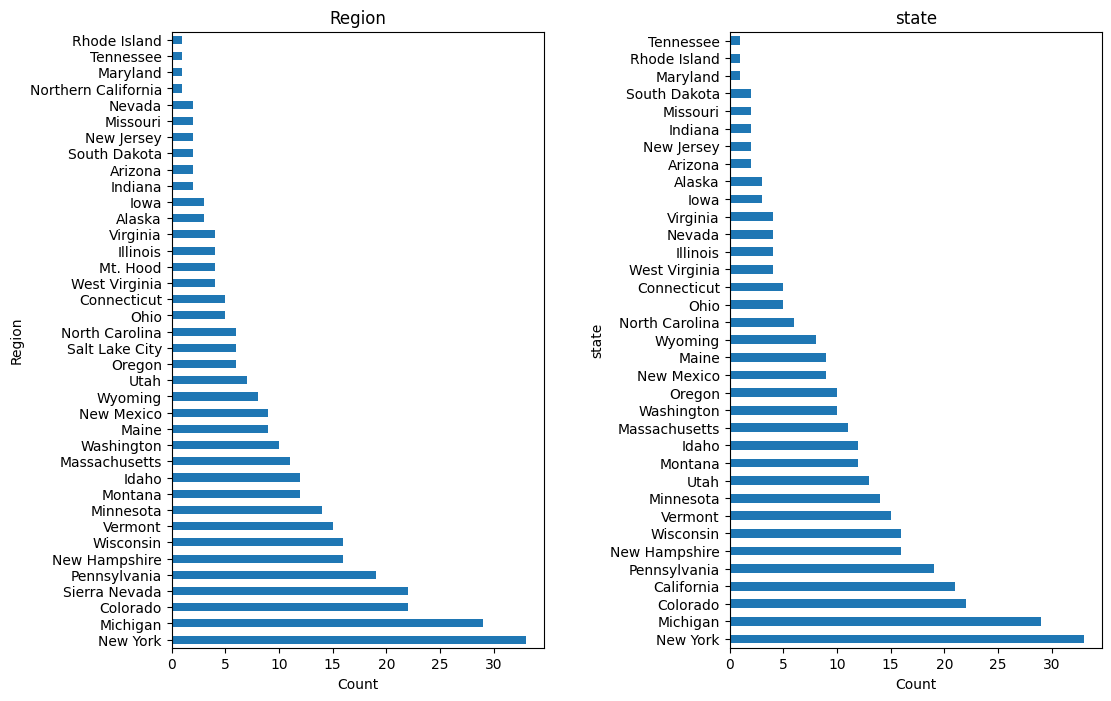

In [88]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Region')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace= 0.5);
#explore a few different figure sizes, orientations, and spacing
# as the importance of easy-to-read and informative figures is frequently understated
# find the ability to tweak figures invaluable later on

When analyzing the distribution of resorts across `State`, I find that New York accounts for the majority of entries. Meanwhile, my target resort is located in Montana, which ranks only 13th in terms of resort count.

This raises several important questions:

* Should I treat states differently based on their resort density or location-based economic factors?

* Does a state like New York command higher prices due to its proximity to large populations?

* If I build a predictive model, would it be biased toward states with more data, such as New York?

Since my primary interest lies in Montana, I consider whether it’s better to:

* Build a general model across all states, risking skewed accuracy, or

* Filter only resorts in Montana to create a Montana-specific model, even if it drastically reduces the sample size.

#### 2.6.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

##### 2.6.3.5.1 Average weekend and weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [89]:
# Calculate average weekday and weekend price by state and sort by the average of the two
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


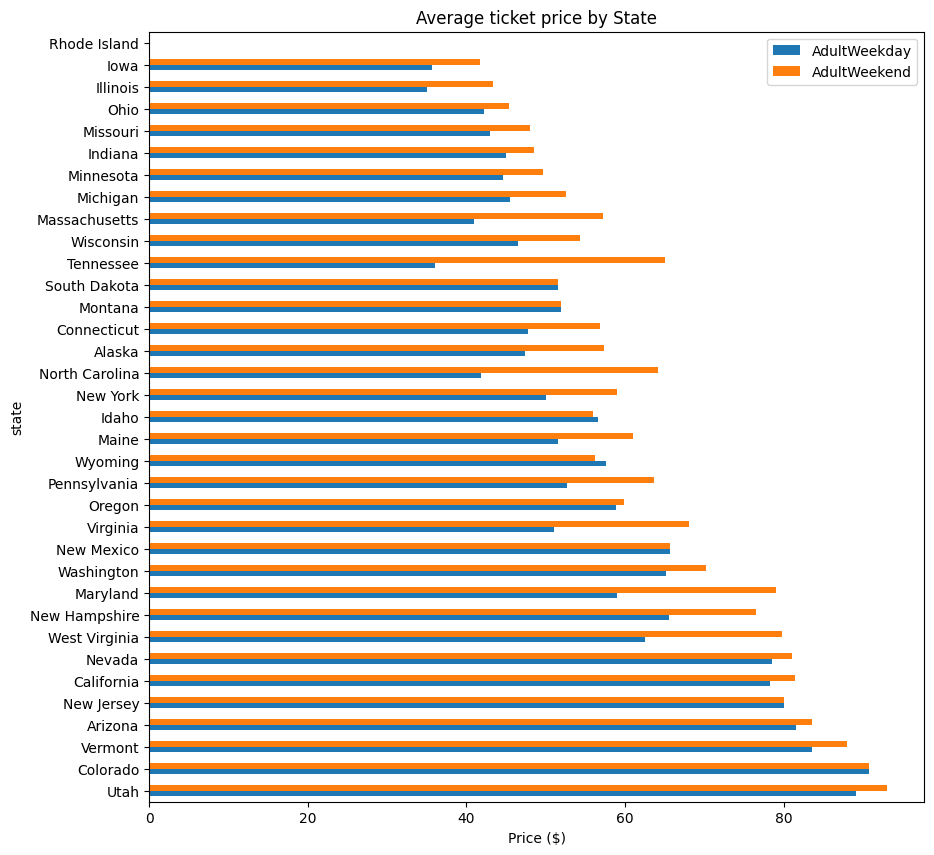

In [90]:
# The next bit simply reorders the index by increasing average of weekday and weekend prices
# state_price_means.index
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

##### 2.6.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Next, transform the data into a single column for price with a new categorical column that represents the ticket type.

In [91]:
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,
#specify 'state' for `id_vars`
#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
#call the resultant price column 'Price' via the `value_name` argument,
#name the weekday/weekend indicator column 'Ticket' via the `var_name` argument
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], 
                        id_vars= 'state', 
                        var_name = 'Tickets', 
                        value_vars=['AdultWeekday', 'AdultWeekend'], 
                        value_name= 'Price')

In [92]:
ticket_prices.head()

,state,Tickets,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


This is now in a format we can pass to [seaborn](https://seaborn.pydata.org/)'s [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to create boxplots of the ticket price distributions for each ticket type for each state.

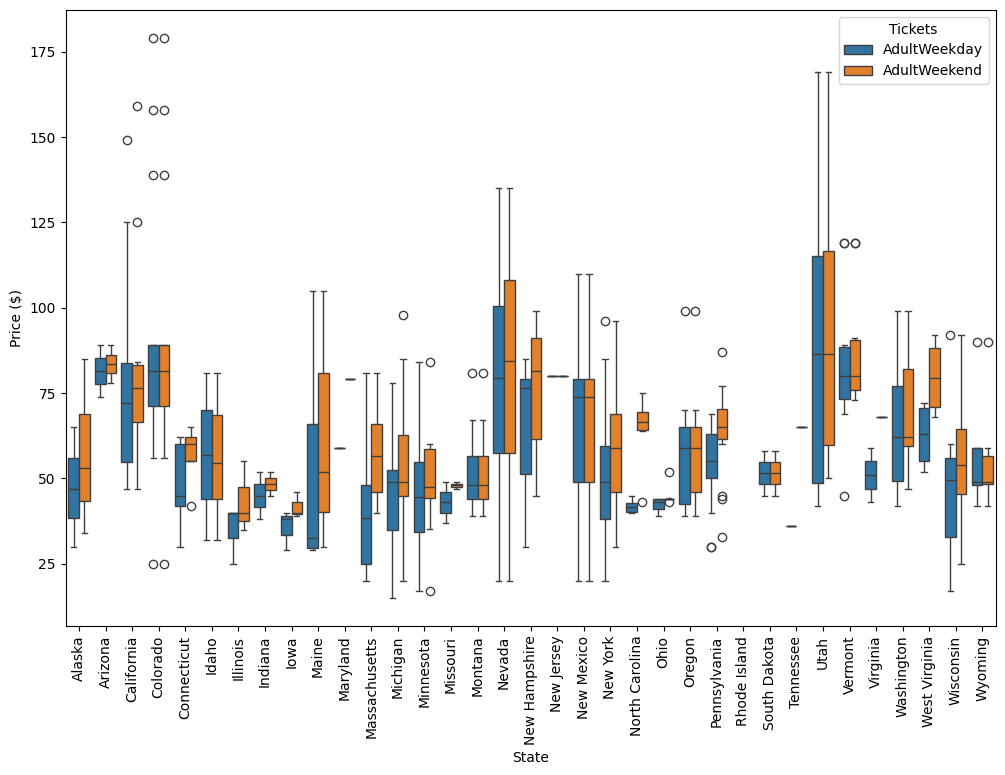

In [93]:
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Tickets', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

Ticket Price Variability Across States
From my exploration, I observe that most `ticket prices` range from around $25 to over $100, with California, Colorado, and Utah showing some of the highest prices.

Certain states—like Montana (my target) and South Dakota—show:

* Low variability in prices

* Close alignment between `AdultWeekday` and `AdultWeekend` prices

In contrast, states like Nevada and Utah show a wide spread in ticket prices. Others, like North Carolina and Virginia, have weekend prices significantly higher than weekday prices.

This variability suggests possible ways to group resorts, such as:

* Resorts with low price spread

* Resorts with lower average prices

* Resorts that charge a premium for weekends

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [94]:
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


Handling Missing Ticket Prices
I observe that around 16% of resorts are missing values for one or both ticket price fields. This presents a fundamental issue: for those records, I simply do not have enough data to include them in any price-based modeling.

In [95]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
Name: count, dtype: float64

From my analysis:

* 82% of resorts have no missing ticket prices (both weekday and weekend available)

* 3% are missing one of the two prices

* 14% are missing both ticket price values

Naturally, I will need to drop the records that are missing both AdultWeekday and AdultWeekend, since they offer no pricing data to model or analyze.

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

Although I'm still in the data wrangling and cleaning phase rather than full exploratory analysis, examining the distributions of key features is already proving useful. It helps me assess whether the values look reasonable and whether any obvious outliers need to be flagged. While this isn't yet focused on uncovering deeper patterns or relationships, a certain amount of exploratory analysis naturally overlaps with the cleaning process. At this stage, my emphasis is on making sure the data looks plausible and internally consistent. Later on, I’ll shift my focus toward identifying trends, correlations, and more complex insights.

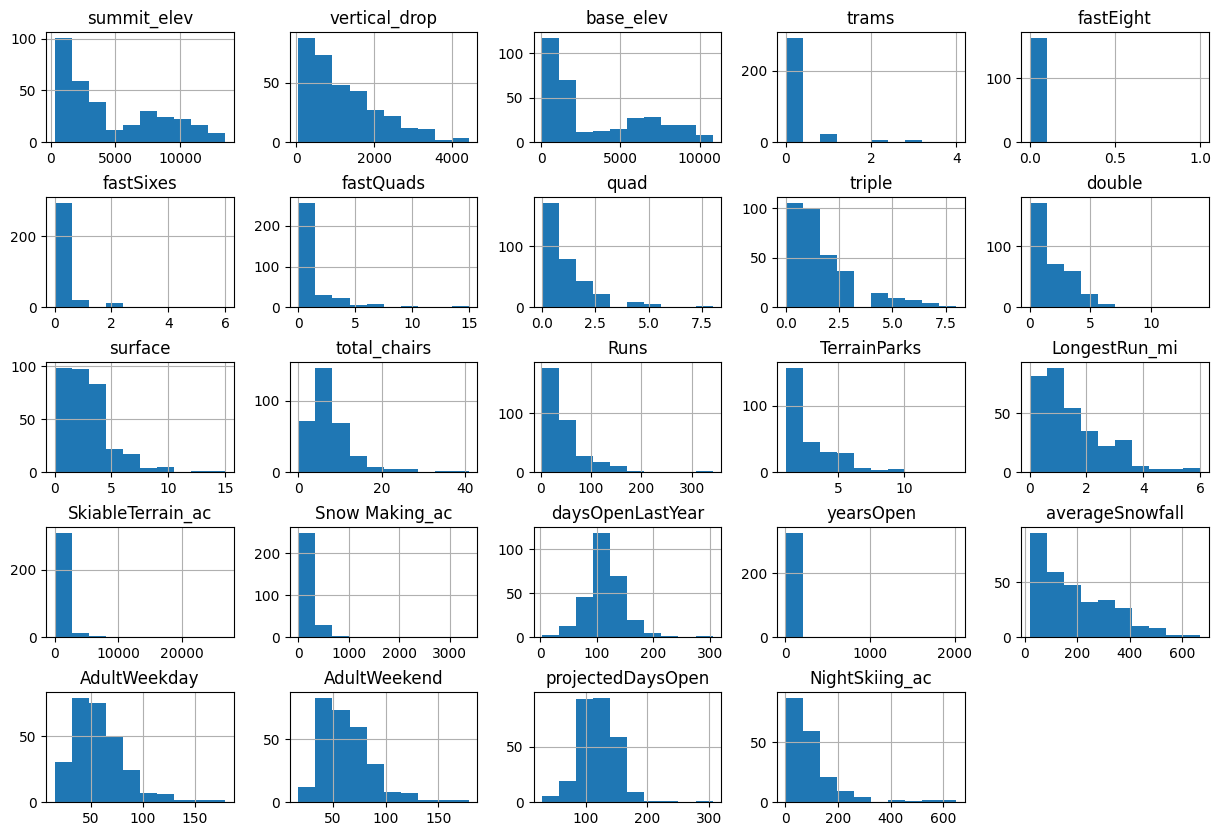

In [96]:
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#figsize=(15,10)
#calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
ski_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace= 0.5);

What features do we have possible cause for concern about and why?

* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

In [97]:
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
ski_data.SkiableTerrain_ac[ski_data.SkiableTerrain_ac > 10000]

39    26819.0
Name: SkiableTerrain_ac, dtype: float64

In [98]:
#print the whole row to investigate all values, including seeing the resort name
#transpose 
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


While spot-checking the data, I notice that the `top` and `base` elevation values appear consistent, but the `skiable area` shows an unusual value of `26819`. Based on external reference, the correct value should be `1819`. Interestingly, the last three digits match, which suggests this could be a data entry or transcription error—perhaps an extra digit was added during manual input or data transfer. For the sake of continuing the analysis, I choose to replace the suspect value with the corrected one. However, I clearly document this change and treat it as a temporary correction, not a final verdict on what the true value should be. Ideally, this kind of inconsistency should be reported back to the client or data provider for clarification, as data correction is not a responsibility to take lightly. Here, my goal is simply to allow the analysis to proceed meaningfully.

In [99]:
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

np.float64(26819.0)

In [100]:
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [101]:
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

np.float64(1819.0)

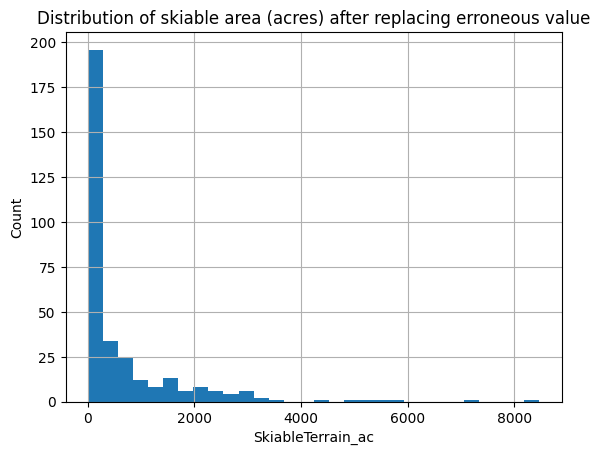

In [102]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

Looking at the current distribution, I observe a long right tail, with a few extreme values standing out. One value above 8000 catches my attention, and even the value near 7000 seems worth questioning. These outliers may be legitimate or may warrant further investigation. While I could choose to manually validate each of these entries, I decide to leave them as-is for now, since the overall shape of the distribution still appears plausible. I make a note of these values for potential review later in the analysis, especially if they start to influence model performance or interpretation.

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

In [103]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [104]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


To save time, here is a link to the website for [Heavenly Mountain Resort](https://www.skiheavenly.com/the-mountain/about-the-mountain/mountain-info.aspx). 

What, then, is the rough guess for the area covered by snowmaking?

In [105]:
.6 * 4800

2880.0

While spot-checking Heavenly Mountain Resort, I notice that the official snowmaking coverage is listed as 60%, which is less than the 3379 value in my dataset. This discrepancy would normally prompt a judgment call about whether to correct the value. However, upon further inspection, I realize that this resort has no ticket pricing information at all—neither AdultWeekday nor AdultWeekend is available. As a result, the entire row will ultimately be dropped from the analysis. Given that, any further effort spent validating or correcting other feature values for this resort would be unnecessary. I simply document this and move on.

##### 2.6.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

Look at the different fastEight values more closely:

In [106]:
ski_data.fastEight.value_counts()

fastEight
0.0    163
1.0      1
Name: count, dtype: int64

Drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [107]:
#Drop the 'fastEight' column from ski_data.
ski_data.drop(columns= 'fastEight', inplace=True)

What about yearsOpen? How many resorts have purportedly been open for more than 100 years?

In [108]:
#Filter the 'yearsOpen' column for values greater than 100
ski_data.yearsOpen[ski_data.yearsOpen > 100]

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64

Okay, one seems to have been open for 104 years. But beyond that, one is down as having been open for 2019 years. 

What does the distribution of yearsOpen look like if exclude just the obviously wrong one?

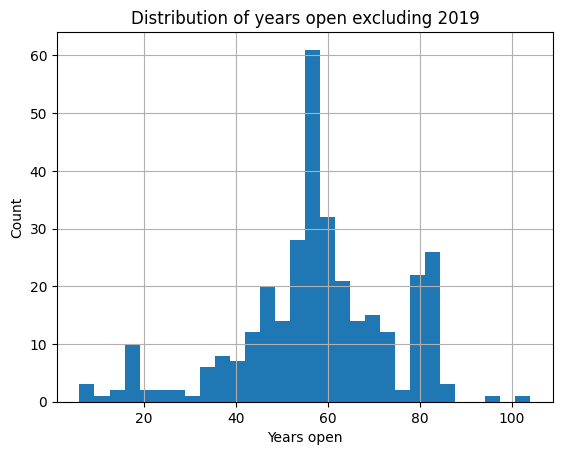

In [109]:
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist()
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins =  30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

The distribution of years open appears entirely plausible, including the maximum value of 104 years, which aligns with expectations for some of the oldest resorts. However, I also notice a clearly erroneous value of 2019—no resort could have been open for over two millennia. More likely, this value indicates the year the resort opened (i.e., 2019), or perhaps the expected opening year if the resort was still under development. Since I don’t know exactly when this dataset was compiled, I can’t determine the true intent with certainty. I flag this as an obvious data issue and treat it accordingly in the cleaning process.

Let's review the summary statistics for the years under 1000.

In [110]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

Aside from the outlier value of 2019, the smallest valid number of years open in the dataset is 6. For the resort with the 2019 entry, I can't be certain whether it has been open for zero years, one year, or if the number represents a projection rather than an actual operational duration. Without knowing when the data were collected, it's impossible to interpret the value accurately. Since including it would effectively introduce a new "youngest" resort with unclear status, I decide it’s best to drop this row from the dataset to preserve the integrity of the analysis.

In [111]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

##### 2.6.4.2.4 fastSixes and Trams<a id='2.6.4.2.4_fastSixes_and_Trams'></a>

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

By this point, I’ve removed only one row—from a resort that may not have opened yet or is possibly in its first operating season. Before removing any additional records, I pause to consider the state-wide market context. From a business perspective, factors like night skiing availability, total skiable terrain, and number of days open across an entire state could play a role in shaping a resort’s pricing strategy. For example, if a resort dominates the night skiing supply in its state, that could justify a pricing premium. To capture these dynamics, I decide to compute state-level summary statistics (such as total skiable area, average days open, and total night skiing acres) for each state. I do this now—before dropping rows with missing ticket prices—because even though those resorts lack price data, they still contribute to the overall market structure, and have been open for at least six years. These aggregated features will be useful later as contextual inputs to the model.

Many of the features in the dataset relate to chairlifts and altitudes, which, while useful for describing a resort’s infrastructure, are not directly relevant to the pricing strategy I aim to study. Instead, I focus on features that represent the available skiing experience and the scale of operations at the state level. These include:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac

These are all quantities that make sense to sum across a state, as they provide a picture of the total market supply available in each location. While I could also consider the number of ski runs, I find that `SkiableTerrain_ac` is more informative and continuous, giving a better sense of scale than a simple count. I will now aggregate these four features by state to create state-wide summary variables for later modeling.

A fairly new groupby behaviour is [named aggregation](https://pandas-docs.github.io/pandas-docs-travis/whatsnew/v0.25.0.html). This allows to clearly perform the aggregations ,also creating informative output column names.

In [112]:
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#Finally, add a call to the reset_index() method 
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

I know that there are two columns in the dataset that refer to ticket pricing: `AdultWeekend` and `AdultWeekday`. To better understand the completeness of the pricing data, I calculate the number of missing price values per row. Since there are only two columns involved, this number will naturally fall into one of three categories:

* 0 indicates no missing values — both prices are present,

* 1 indicates that one price is missing,

* 2 indicates that both prices are missing and the row will eventually be dropped.

This simple count helps me visualize and plan the next steps in the data cleaning process, ensuring I retain as much useful pricing data as possible.

In [113]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.317073
2    14.329268
1     3.353659
Name: count, dtype: float64

About 14% of the rows have no price data. As the price is my target, these rows are of no use. Time to lose them.

In [114]:
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

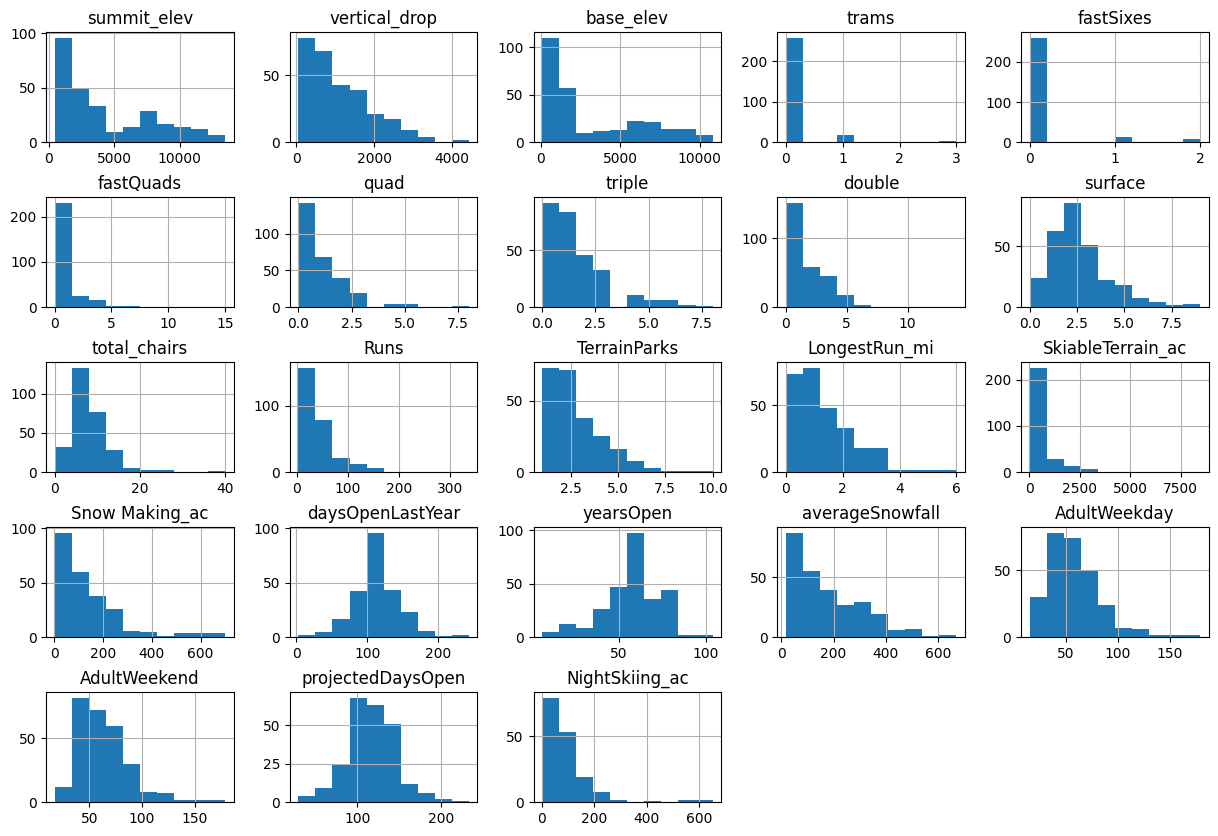

In [115]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

The distributions now look much better overall, but I do observe that some features—such as `fastQuads`, `fastSixes`, and possibly `trams`—are highly skewed, with most values clustered around `0` and a few extreme outliers. These features lack substantial variance and may pose challenges during modeling. A potential issue to watch for is when a model fails to recognize the importance of such a feature, even though domain knowledge suggests it should matter. Conversely, there's also the risk of the model being overly influenced by rare extreme values. While a well-constructed machine learning pipeline should be robust to these issues, I also consider applying nonlinear transformations (e.g., log or square root) to mitigate skewness and stabilize variance during training.

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). 

I acknowledge the importance of exercising healthy caution when incorporating data I’ve “found on the Internet.” It’s critical that any external dataset I use comes from a reputable and trustworthy source. In this case, the state size and population table I’ve integrated is useful for enriching my analysis—especially as I build a first-cut model that considers state-level market context. The key here is transparency: I explicitly document the source of this dataset within the workflow to ensure it is open to inspection and review. That said, I remain flexible—if a client prefers a specific data provider they trust, I am prepared to re-run the analysis using that source. Every step in the pipeline is traceable and subject to revision.

In [116]:
#Use pandas' `read_html` method to read the table
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [117]:
type(usa_states)

list

In [118]:
len(usa_states)

1

In [119]:
usa_states = usa_states[0]
usa_states.head()

Name & postal abbs. [1]                                 Cities               \
  Name & postal abbs. [1] Name & postal abbs. [1].1      Capital   Largest[5]   
0                 Alabama                        AL   Montgomery   Birmingham   
1                  Alaska                        AK       Juneau    Anchorage   
2                 Arizona                        AZ      Phoenix      Phoenix   
3                Arkansas                        AR  Little Rock  Little Rock   
4              California                        CA   Sacramento  Los Angeles   

  Established[A] Population [B][3] Total area[4]          Land area[4]  \
  Established[A] Population [B][3]           mi2      km2          mi2   
0   Dec 14, 1819           4903185         52420   135767        50645   
1    Jan 3, 1959            731545        665384  1723337       570641   
2   Feb 14, 1912           7278717        113990   295234       113594   
3   Jun 15, 1836           3017804         53179   137732        52035   
4    Sep 9, 1850          39512223        163695   423967       155779   

           Water area[4]         Number of Reps.  
       km2           mi2     km2 Number of Reps.  
0   131171          1775    4597               7  
1  1477953         94743  245384               1  
2   294207           396    1026               9  
3   134771          1143    2961               4  
4   403466          7916   20501              53

It’s worth noting that even in the past year, the capabilities of `pd.read_html()` have improved significantly. For example, merged cells in HTML tables—such as a city name like `'Phoenix'` spanning multiple rows—are now handled much more gracefully. In the extracted DataFrame, values like `'Phoenix'` are now automatically duplicated, ensuring proper alignment with subsequent columns. Still, I make a point to inspect the structure to confirm the data is parsed correctly. When extracting the `'Established'` column, I expect to retrieve just dates. Previously, I used the `.loc[]` accessor when referring to columns by label. But here, since I’m accessing a column by its index position, I switch to using `.iloc[]`. This distinction ensures clarity and precision in how I work with tabular data pulled from the web.

In [120]:
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
established = usa_states.iloc[:, 4]

In [121]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

Extract the state name, population, and total area (square miles) columns.

In [122]:
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [123]:
#Find the states in `state_summary` that are not in `usa_states_sub`
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

When I look at the original table on the web, I begin to suspect a formatting issue—specifically in how some state names are labeled. To investigate further, I pull out the entries from `usa_states_sub` that contain known multi-word state names such as `'Massachusetts'`, `'Pennsylvania'`, or `'Virginia'`. This helps me confirm whether the parsing process has misaligned or partially captured these names. Spot-checking these cases allows me to verify whether `pd.read_html()` handled these entries correctly, or whether some manual cleanup is necessary before proceeding with the merge or feature engineering steps.

In [124]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

Delete square brackets and their contents and try again:

In [125]:
#Use pandas' Series' `replace()` method to replace anything within square brackets
#to_replace='\[.*\]' 
#value='' #empty string as replacement
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex= True, inplace= True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [126]:
#And now verify none of the states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

After resolving the formatting issues and verifying the integrity of state names, I now see that the set of missing states is empty—a good sign that the merge was successful. With this confirmation, I confidently proceed to add the population and state area columns to the ski resort dataset. These additional features will allow me to explore state-level market context, such as resort density, population-to-terrain ratios, and other derived metrics that could inform pricing behavior in my first-cut models.

In [127]:
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
state_summary = state_summary.merge(usa_states_sub, how = 'left', on = 'state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


Now that I’ve created a DataFrame containing summary statistics for each state, it might seem natural to go ahead and join it with the ski resort data to enrich the dataset. While I do plan to perform that merge, I decide not to do it just yet. In the next notebook, I’ll be focusing on exploring state-level patterns—including comparisons between states—so it's more appropriate to work with a dataset where each row represents a single state, as I have here. Merging it too early would introduce redundancy, forcing me to later separate out the state-level data again. For now, I preserve the state-level summary as its own DataFrame and will integrate it into the resort-level data at a more suitable stage.


## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

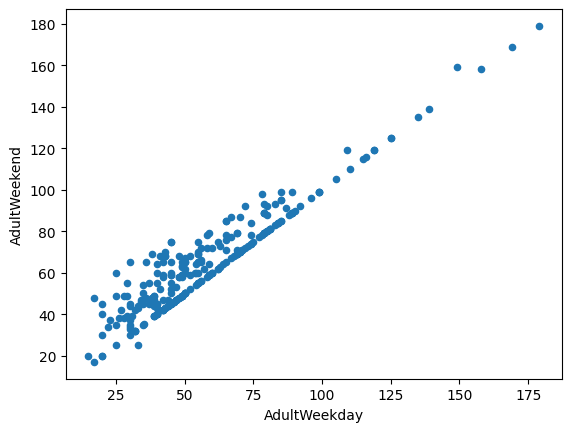

In [128]:
# method to create a scatterplot (kind='scatter')

ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind= 'scatter');

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the boxplot earlier that the distribution for weekday and weekend prices in Montana seemed equal. Is this confirmed in the actual data for each resort? Big Mountain resort is in Montana, so the relationship between these quantities in this state are particularly relevant.

In [129]:
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend', 'AdultWeekend']]

,AdultWeekend,AdultWeekend
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


Is there any reason to prefer weekend or weekday prices? Which is missing the least?

In [130]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [131]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [132]:
ski_data.shape

(277, 25)

Perform a final quick check on the data.

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [133]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
141,5,20.0
146,5,20.0
86,5,20.0
74,5,20.0
62,5,20.0
329,5,20.0
264,4,16.0
198,4,16.0
96,4,16.0
186,4,16.0


These seem possibly curiously quantized...

In [134]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

Yes, the percentage of missing values per row appear in multiples of 4.

In [135]:
missing['%'].value_counts()

%
0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: count, dtype: int64

The missingness pattern in some features feels almost artificial, as if certain values were intentionally removed. However, the key point is that I don’t yet know how useful these missing features are in predicting ticket prices. Just because a row is missing multiple values doesn't mean it's automatically unfit for modeling—not all features carry equal predictive power. Therefore, I avoid dropping rows simply because they lack data in fields that may turn out to be uninformative. Instead, I prioritize keeping rows that still have my target variable and a core set of meaningful predictors, and I revisit feature importance during model development.

In [136]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non-null

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

## 2.12 Save data<a id='2.12_Save_data'></a>

In [137]:
ski_data.shape

(277, 25)

Save to the data directory, separately. Note - provided with the data in `raw_data` and saving derived data in a separate location. This guards against overwriting our original data.

In [138]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

A file already exists with this name.



Do you want to overwrite? (Y/N) Y


Writing file.  "../data\ski_data_cleaned.csv"


In [139]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

A file already exists with this name.



Do you want to overwrite? (Y/N) Y


Writing file.  "../data\state_summary.csv"
